# Web Scraping

In [2]:
{message=FALSE}
library(rvest)
library(stringr) # str_trim
page = read_html("https://www.imdb.com/movies-in-theaters/?ref_=nv_tp_inth_1")

Loading required package: xml2


**SelectGadget 插件**

In [2]:
ttls = page %>% html_nodes(css="a")  #得到nodes
ttls

{xml_nodeset (381)}
 [1] <a href="/?ref_=nv_home" title="Home" class="navbarSprite" id="home_img" ...
 [2] <a href="/?ref_=nv_home" title="Home">IMDb</a>
 [3] <a href="/search/">More</a>
 [4] <a href="/movies-in-theaters/?ref_=nv_tp_inth_1">Movies</a>
 [5] <a href="/chart/toptv/?ref_=nv_tp_tv250_2">TV</a>
 [6] <a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a>
 [7] <a title="                            The Green Mile\n, #32 on IMDb Top  ...
 [8] <a href="/title/tt0120689/?ref_=nv_mv_dflt_2" id="titleMenuImageClick">\ ...
 [9] <a href="/chart/top?ref_=nv_mv_dflt_3" id="titleMenuImageSecondaryClick" ...
[10] <a href="/movies-in-theaters/?ref_=nv_mv_inth_1">In Theaters</a>
[11] <a href="/showtimes/?ref_=nv_mv_sh_2">Showtimes &amp; Tickets</a>
[12] <a href="/trailers/?ref_=nv_mv_tr_3">Latest Trailers</a>
[13] <a href="/movies-coming-soon/?ref_=nv_mv_cs_4">Coming Soon</a>
[14] <a href="/calendar/?ref_=nv_mv_cal_5">Release Calendar</a>
[15] <a href="/chart/top?ref_=nv_mv_250_6">Top Rated Mo

In [30]:
genres = page %>% html_nodes(css = "a") %>% html_text()  #将nodes转化成text
genres = genres %>% str_trim()  #删掉空格和\n等
genres

[1] ""                                                                                                                                                                                                       
  [2] "IMDb"                                                                                                                                                                                                   
  [3] "More"                                                                                                                                                                                                   
  [4] "Movies"                                                                                                                                                                                                 
  [5] "TV"                                                                                                                                                                                                     
  [6] "Showtimes"                                                                                                                                                                                              
  [7] ""                                                                                                                                                                                                       
  [8] "Terminator 2: Judgment Day\n (1991)"                                                                                                                                                                    
  [9] "#42 on IMDb Top Rated Movies"                                                                                                                                                                           
 [10] "In Theaters"                                                                                                                                                                                            
 [11] "Showtimes & Tickets"                                                                                                                                                                                    
 [12] "Latest Trailers"                                                                                                                                                                                        
 [13] "Coming Soon"                                                                                                                                                                                            
 [14] "Release Calendar"                                                                                                                                                                                       
 [15] "Top Rated Movies"                                                                                                                                                                                       
 [16] "Top Rated Indian Movies"                                                                                                                                                                                
 [17] "Most Popular Movies"                                                                                                                                                                                    
 [18] "Box Office"                                                                                                                                                                                             
 [19] "Oscar Winners"                                                                                                                                                                                          
 [20] "Most Popular by Genre"                     

In [40]:
page=read_html("https://www.imdb.com/search/title?count=100&release_d ate=2017,2017&title_type=feature")
html_nodes(page, css = ".ratings-imdb-rating") %>% html_text() %>% str_trim()

[1] "8.9" "8.9" "7.6" "8.6" "7.2" "8.0" "9.5" "8.6" "8.5" "8.4" "9.2" "8.4"
[13] "7.9" "7.8" "7.7" "7.7" "5.1" "7.8" "7.6" "7.0" "7.5" "8.2" "8.7" "8.4"
[25] "7.8" "5.0" "4.4" "8.1" "7.3" "7.9" "7.9" "8.3" "8.3" "8.3" "7.0" "8.0"
[37] "7.4" "8.3" "8.6" "8.3" "8.6" "8.1" "8.1" "7.7" "8.1" "8.8" "8.9" "7.8"
[49] "7.0" "7.5" "7.0" "8.7" "4.6" "8.1" "8.4" "8.1" "7.8" "8.3" "8.9" "7.2"
[61] "7.7" "8.9" "6.4" "8.4" "8.6" "7.8" "7.0" "6.1" "6.6" "7.5" "7.7" "6.7"
[73] "6.4" "6.7" "7.3" "7.6" "6.8" "8.8" "7.2" "6.1" "7.3" "6.5" "6.5" "7.4"
[85] "7.4" "6.4" "6.7" "6.6" "8.2" "5.9"

In [44]:
# 迭代式地爬取数据，这样可以知道是第几个数据缺失
page=read_html("https://www.imdb.com/search/title?count=100&release_d ate=2017,2017&title_type=feature")
ratings = page %>% html_nodes(css = ".ratings-bar")
metascores = lapply(ratings, function(x) {html_nodes(x, ".metascore") %>% html_text(trim = T)})

In [43]:
page = read_html("https://en.wikipedia.org/wiki/Rheumatoid_arthritis")
tb = page %>% html_node(css = ".infobox") %>% html_table()
tb = as.data.frame(tb)
tb

爬取yelp数据，发现不行，因为每个都是链接

In [62]:
page = read_html("http://www.yelp.com/search?find_loc=New+York,+NY,+USA")
page %>% html_nodes("#super-container.js-analytics-click span") %>% html_attr('href')

character(0)

In [51]:
page = read_html("http://www.yelp.com/search?find_loc=New+York,+NY,+USA")
links = page %>% html_nodes(xpath = "//a") %>% html_attr("href")
links[str_detect(links, "http")] #找到其中有http的字符串

[1] NA                                                                                                                
  [2] "https://www.yelp.com/login?return_url=%2Fsearch%3Ffind_loc%3DNew%2BYork%252C%2BNY%252C%2BUSA"                    
  [3] "https://www.yelp.com/login?return_url=%2Fsearch%3Ffind_loc%3DNew%2BYork%252C%2BNY%252C%2BUSA"                    
  [4] "https://support.google.com/chrome/answer/142065?co=GENIE.Platform%3DDesktop&hl=en&oco=0"                         
  [5] NA                                                                                                                
  [6] "https://support.apple.com/en-us/HT204690"                                                                        
  [7] "https://www.mozilla.org/en-US/firefox/geolocation/"                                                              
  [8] "https://www.yelp.com/login?return_url=%2Fsearch%3Ffind_loc%3DNew%2BYork%252C%2BNY%252C%2BUSA"                    
  [9] NA                                                                                                                
 [10] NA                                                                                                                
 [11] NA                                                                                                                
 [12] NA                                                                                                                
 [13] NA                                                                                                                
 [14] NA                                                                                                                
 [15] NA                                                                                                                
 [16] NA                                                                                                                
 [17] NA                                                                                                                
 [18] NA                                                                                                                
 [19] NA                                                                                                                
 [20] NA                                                                                                                
 [21] NA                                                                                                                
 [22] NA                                                                                                                
 [23] NA                                                                                                                
 [24] NA                                                                                                                
 [25] NA                                                                                                                
 [26] NA                                                                                                                
 [27] NA                                                                                                                
 [28] NA                                                                                                                
 [29] "https://yelp.com/about"                                                                                          
 [30] "http://yelp-ir.com/"                                                                                             
 [31] "https://officialblog.yelp.com/"                                                                                  
 [32] "https://www.yelp-support.com/?l=en_US"                                                                           
 [33] "https://biz.yelp.com/?utm_campaign=claim_business&utm_content=claim_footer_link&utm_medium=www&utm_source=footer"
 [34] "ht

# Embedding

In [31]:
cf<-readLines("处方.txt",encoding = "UTF-8")
##不定长的数据不能用read.table,read.csv(用于读取矩阵形式)
cf[2]


dl<-str_split(str_trim(cf)," +")
class(dl[[1]])
#list[[1]]表示列表的第一项的第一个元素，譬如第一项是个向量，那么表示向量的第一个元素
class(dl[1])
drugs<-unique(unlist(dl))
##unlist拼接,unique去掉重复

#临时生成一个模板
junk<-rep(0,length(drugs))
names(junk)=drugs
m=sapply(dl,function(x){y=junk;z=table(x);y[names(z)]=z;y})
#统计每个元素出现的次数
rownames(m) = drugs

[1] "白芷 蒺藜 蔓荆子 桑寄生 川断 牛膝 川芎 枳实 枳壳 三棱 枸杞子 菊花 元胡"

[1] "character"

[1] "list"

In [32]:
m

柴胡,1,0,1,1,1,1,0,0,0,1,⋯,0,1,0,1,0,1,1,1,1,1
黄芩,1,0,1,1,1,1,0,1,0,1,⋯,0,1,0,1,0,1,1,1,1,1
姜半夏,1,0,1,1,0,0,0,1,0,0,⋯,0,0,0,1,0,1,0,1,0,0
赤芍,1,0,0,1,0,1,1,1,0,0,⋯,1,0,1,1,1,0,0,0,1,0
鸡血藤,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
姜黄,1,0,0,0,1,0,0,0,0,1,⋯,0,0,1,1,1,1,0,1,1,0
郁金,1,0,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0
牛膝,1,1,0,0,0,0,1,0,1,1,⋯,1,0,1,1,0,0,0,0,1,0
夏枯草,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
蒺藜,1,1,1,1,1,1,0,0,0,1,⋯,0,1,1,1,1,1,1,0,1,0
蔓荆子,1,1,0,0,1,0,0,1,0,0,⋯,0,0,0,0,0,1,0,0,0,1


[1] 0.9337148

柴胡,黄芩,姜半夏,赤芍,鸡血藤,姜黄,郁金,牛膝,夏枯草,蒺藜,⋯,龟板,猪苓,补骨脂,当归麻黄,威灵仙,苏木,白果,桑白皮,高良姜,地榆
-0.323701494,-0.321883281,-0.11692886,-0.290725313,-0.02992813,-0.27422826,-0.14887812,-0.30377289,-0.0236511012,-0.268228529,⋯,-0.001389715,-0.0030379338,-0.0048399109,-0.003255199,-0.009976951,-0.003255741,-0.0032873896,-0.0036111409,-0.0028938853,-0.0019428160
-0.374084985,-0.330695637,0.02022480,0.191559648,-0.02877303,0.18353306,0.09957770,0.33188563,0.0560972039,-0.100063484,⋯,0.009268489,-0.0057827023,-0.0030915418,-0.017733462,-0.001983998,-0.001313839,-0.0170287190,0.0056119526,-0.0105843382,-0.0080830548
0.153844682,0.151919203,0.36628173,0.045398702,0.01450415,0.24391026,0.24459698,-0.18478261,0.0462022407,-0.103273732,⋯,0.004726687,-0.0033747427,0.0093051984,-0.005680501,0.003550254,0.002379260,-0.0104112535,-0.0050837122,0.0006820606,0.0004510795
-0.245766385,-0.316262851,0.12404531,-0.148912463,0.10743453,0.16808575,0.11825045,0.18927714,0.0068374585,-0.078160519,⋯,0.013536138,-0.0092266365,-0.0057872119,0.001959718,0.004934410,-0.005955906,0.0085036656,-0.0100490143,-0.0066695726,-0.0047771069
0.025929947,0.021631815,-0.11844542,-0.095693881,0.02297862,-0.07278277,0.20756702,0.19071721,-0.0020509397,-0.296966662,⋯,-0.003463970,-0.0136668223,-0.0117869595,0.006108927,-0.009713504,0.001749399,-0.0081628647,0.0005912322,-0.0057764082,-0.0242764948
-0.006746286,0.101415104,0.13599713,0.070786479,-0.04469031,-0.41858347,-0.05456904,0.01009457,0.0027940214,-0.385361208,⋯,0.009454382,0.0037368294,0.0121157515,-0.002563721,-0.009359421,0.001985454,0.0003788138,0.0016973704,0.0028801559,0.0079886921
0.183339155,0.196067499,-0.13936719,0.250350474,0.01069079,0.18085333,-0.37629749,0.10415795,-0.0340504801,-0.326408174,⋯,-0.007680634,0.0096243538,0.0006314119,-0.002892308,0.012237974,0.017800639,0.0019555592,-0.0001974724,0.0044175423,0.0112829080
-0.030583405,0.005382846,0.20925571,0.136834798,0.02552816,-0.17524525,0.37923280,0.01685005,0.1109828228,-0.111236723,⋯,-0.006768580,0.0124412156,0.0014183543,-0.001627419,-0.025323765,0.006954974,0.0009246250,0.0022869255,0.0016448727,0.0116461644
0.122782544,0.140107320,0.10782715,-0.168257427,0.01853271,0.21661585,0.08278459,0.13907535,0.0338481549,-0.215050593,⋯,0.010347791,-0.0164685905,-0.0068078432,-0.016834395,-0.008230824,-0.012617530,-0.0053487496,-0.0233036532,-0.0193714819,-0.0026863912
-0.094609916,-0.057144765,-0.04839667,-0.490527230,-0.09983146,0.17106205,0.06528986,-0.01453797,0.0107220203,-0.019018296,⋯,-0.010866571,0.0044522527,0.0010857482,0.015260097,0.002519481,0.006894165,-0.0227735271,-0.0014509975,0.0224017515,0.0144661359


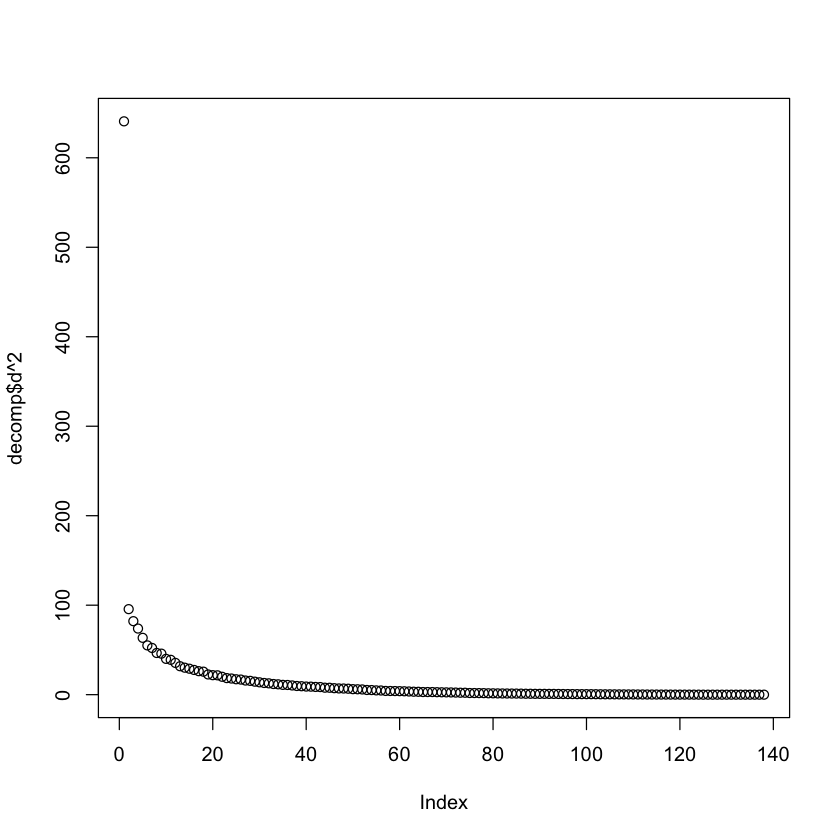

In [36]:
decomp=svd(m)##奇异值分解
plot(decomp$d^2)
embd=t(decomp$u[,1:20])

colnames(embd) = rownames(m)
cor(embd[,"柴胡"],embd[,"黄芩"])
embd

In [38]:
library("Rtsne")

ERROR: Error in library("Rtsne"): there is no package called ‘Rtsne’
